In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import random as random
import numpy as np
import csv

In [ ]:
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]

In [ ]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1) #weight
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
                Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

Streaming output truncated to the last 5000 lines.
bias:-158.07906962270397 	 weight: 2.579890037815036
bias:-158.07899177023452 	 weight: 2.580006250728084
bias:-158.07896272065256 	 weight: 2.5800105441199186
bias:-158.07900915684704 	 weight: 2.5799900693477094
bias:-158.0789313298567 	 weight: 2.58010624419892
bias:-158.07892420278364 	 weight: 2.580109878248274
bias:-158.07895523135076 	 weight: 2.5800840444839697
bias:-158.07887742829007 	 weight: 2.5802001835733805
bias:-158.0789414168961 	 weight: 2.58016739857547
bias:-158.07900540260277 	 weight: 2.580134615058114
bias:-158.07897635627992 	 weight: 2.580138907966994
bias:-158.07897511192851 	 weight: 2.5801396006918123
bias:-158.07894606574501 	 weight: 2.5801438935802725
bias:-158.07893894193973 	 weight: 2.5801475259635254
bias:-158.07898538836716 	 weight: 2.580127046684582
bias:-158.07904937051043 	 weight: 2.5800942649823884
bias:-158.07904812189824 	 weight: 2.580094960079353
bias:-158.0791121012036 	 weight: 2.58006217

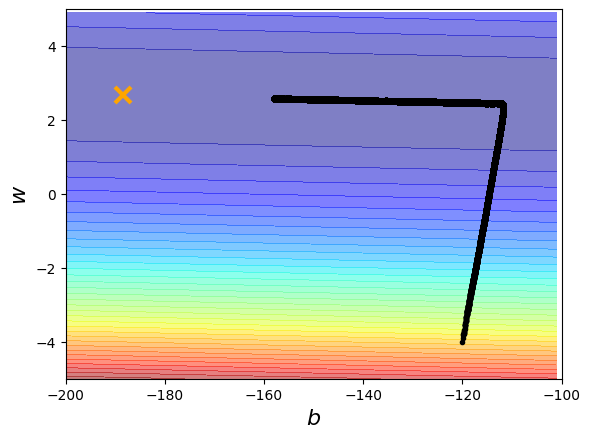

In [ ]:
# ydata = b + w * xdata
b = -120 # initial b
w = -4 # initial w
lr = 0.1 # learning rate
iteration = 5000000
epsilon = 0.0000001


# Initialize Adagrad
grad_b_squared = 0
grad_w_squared = 0

# Store initial values for plotting.
b_history = [b]
w_history = [w]


# Stochastic Gradient Descent with Adagrad
for i in range(iteration):
  # Select a random data point
  idx = np.random.randint(0, len(x_data))
  x_point = x_data[idx]
  y_point = y_data[idx]

  # Compute gradients
  dw = -2 * x_point * (y_point - (w * x_point + b))
  db = -2 * (y_point - (w * x_point + b))

  # squared gradients for Adagrad
  grad_b_squared += db ** 2
  grad_w_squared += dw ** 2

  # Update param with Adagrad
  adaptive_lr_b = lr / (np.sqrt(grad_b_squared) + epsilon)
  adaptive_lr_w = lr / (np.sqrt(grad_w_squared) + epsilon)
  w -= adaptive_lr_w * dw
  b -= adaptive_lr_b * db

  # Store parameters for plotting
  b_history.append(b)
  w_history.append(w)

  print(f'bias:{b} \t weight: {w}')


# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()